<a href="https://colab.research.google.com/github/vivekswamy021/Medical_Expenses_Prediction/blob/main/Medical_Expenses_Prediction_Using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**STEP - 1 : Business Problem Understanding**

- predicting medical expenses based on patient's details

##**STEP - 2 : Load and Collect Data**

In [108]:
from google.colab import files
uploaded = files.upload()

Saving insurance.xlsx to insurance (1).xlsx


In [109]:
#importing libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [110]:
df=pd.read_excel("insurance.xlsx")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


##**Data understanding**

In [111]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [112]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [114]:
df.shape

(1338, 7)

In [115]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [116]:
df.size

9366

In [117]:
df['sex'].value_counts()

,count
sex,
male,676
female,662


In [118]:
df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


In [119]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [120]:
df['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


**Exploratory Data Analysis**

In [121]:
continous = ['age','bmi','expenses']
discrete_categorical = ['sex','smoker','region']
discrete_count = ['children']

In [122]:
df[continous].describe()

,age,bmi,expenses
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,13270.422414
std,14.049960,6.098382,12110.011240
min,18.000000,16.000000,1121.870000
25%,27.000000,26.300000,4740.287500
50%,39.000000,30.400000,9382.030000
75%,51.000000,34.700000,16639.915000
max,64.000000,53.100000,63770.430000


In [123]:
df[discrete_categorical].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


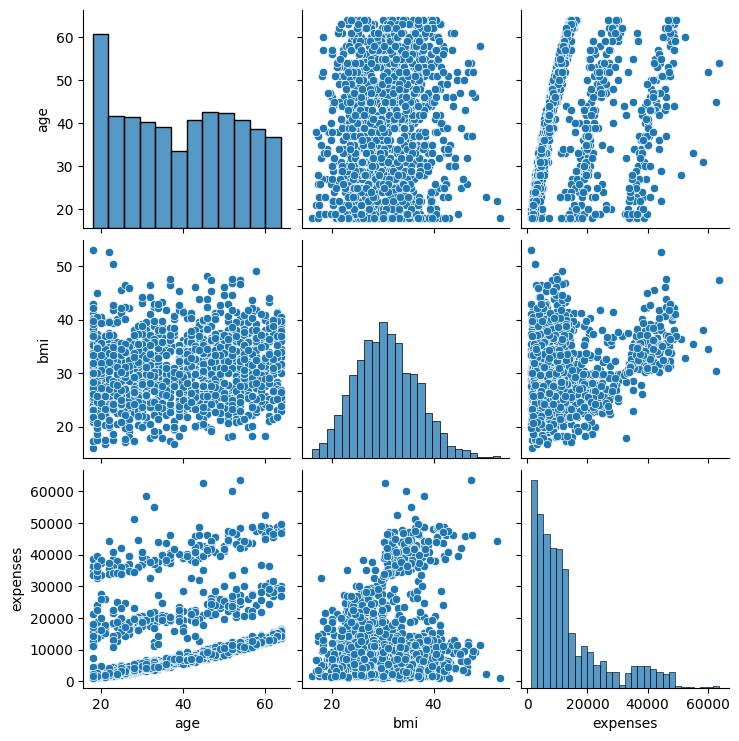

In [124]:
sns.pairplot(df[continous])
plt.show()

In [125]:
df[continous].corr()

,age,bmi,expenses
age,1.000000,0.109341,0.299008
bmi,0.109341,1.000000,0.198576
expenses,0.299008,0.198576,1.000000


<Axes: >

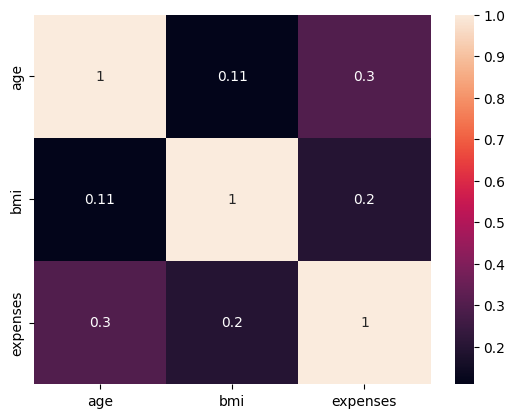

In [126]:
sns.heatmap(df[continous].corr(),annot = True)

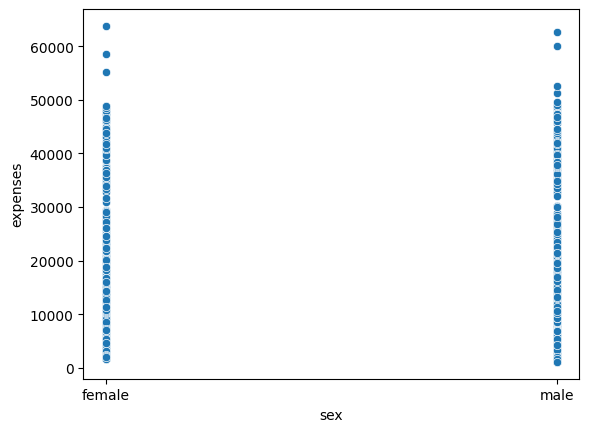

In [127]:
sns.scatterplot(x=df['sex'], y=df['expenses'])   # expenses are high in male (1)
plt.show()

<Axes: xlabel='sex', ylabel='Count'>

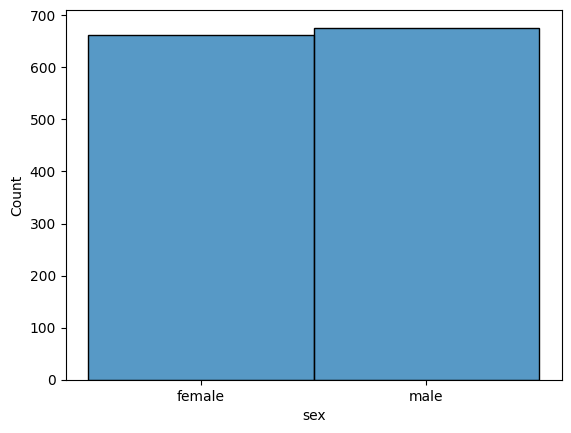

In [128]:
sns.histplot(df['sex'])

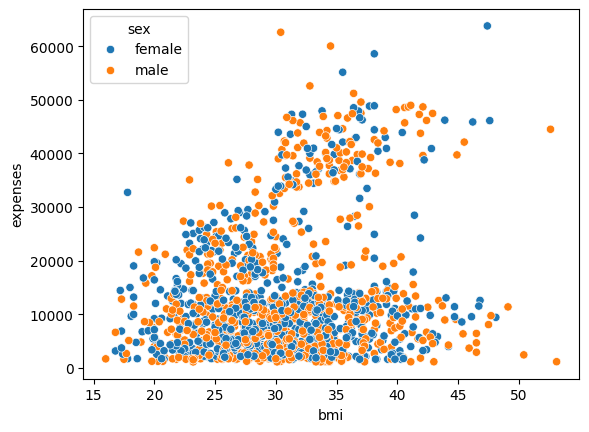

In [129]:
sns.scatterplot(x=df['bmi'], y=df['expenses'], hue='sex', data=df)
plt.show()

##**STEP - 3 : Data Preprocessing**

In [130]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


In [131]:
df.duplicated().sum()

np.int64(1)

In [132]:
df[df.duplicated()]   # give duplicated row or column

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


**DAta cleaning**

In [133]:
df.drop_duplicates(inplace=True)

In [134]:
df.duplicated().sum()

np.int64(0)

In [135]:
df[continous].skew()   # continous are right skewed

,0
age,0.054781
bmi,0.284463
expenses,1.515391


**Droping region column as it is not important in predicting expenses**

In [136]:
df.drop('region',axis=1,inplace=True)

In [137]:
df.head()

,age,sex,bmi,children,smoker,expenses
0,19,female,27.9,0,yes,16884.92
1,18,male,33.8,1,no,1725.55
2,28,male,33.0,3,no,4449.46
3,33,male,22.7,0,no,21984.47
4,32,male,28.9,0,no,3866.86


##**Encoding**

In [138]:
df['sex'].replace({'male':1,'female':0},inplace=True)

df['smoker'].replace({'yes':1,'no':0},inplace=True)

In [139]:
df.head(1)

,age,sex,bmi,children,smoker,expenses
0,19,0,27.9,0,1,16884.92


##**Linear Regression**

#**X & Y**

In [140]:
x=df.drop('expenses',axis=1)
y=df['expenses']

**Train Test split**

In [141]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=9)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

In [143]:
print('coefficient:',model.coef_)
print('intercept:',model.intercept_)

coefficient: [  264.55027389  -121.59763853   318.49249753   412.05023696
 23987.90487402]
intercept: -12154.733274507695


In [144]:
#prediction on train data
ypred_train = model.predict(x_train)

In [145]:
# RMSE Train
from sklearn.metrics import mean_squared_error
print('Train RMSE:',np.sqrt(mean_squared_error(y_train,ypred_train)))

Train RMSE: 6044.336900305296


In [146]:
#Train R2
from sklearn.metrics import r2_score
print('Train R2 Score:',r2_score(y_train,ypred_train))

Train R2 Score: 0.7593836665917533


In [147]:
from sklearn.model_selection import cross_val_score
print('CV:',cross_val_score(model,x_train,y_train,cv=5,scoring='r2').mean())

CV: 0.7534484206957632


In [148]:
#prediction on test data
ypred_test = model.predict(x_test)

In [149]:
print('Test R2:',r2_score(y_test,ypred_test))

Test R2: 0.7005936402138648


##**calculatig best random state number for model**

In [150]:
Train = []
CV=[]
for i in range(1,100):
  from sklearn.model_selection import train_test_split
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)

  from sklearn.linear_model import LinearRegression
  model_lr=LinearRegression()
  model_lr.fit(x_train,y_train)

  y_pred_train=model_lr.predict(x_train)

  from sklearn.metrics import r2_score
  Train.append(r2_score(y_train,y_pred_train))

  from sklearn.model_selection import cross_val_score
  CV.append(cross_val_score(model_lr,x_train,y_train,cv=5,scoring='r2').mean())

em=pd.DataFrame({'Train':Train,'CV':CV})
gm=(em[(abs(em['Train']-em['CV'])<=0.05)])
Rs=gm[gm['CV']==gm['CV'].max()].index.tolist()[0]
print("best random state number:",Rs)

best random state number: 54


##**Final model using best random state number**

In [151]:
x=df.drop('expenses',axis=1)
y=df['expenses']

In [152]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=54)

##**Modelling**

In [ ]:
from sklearn.linear_model import LinearRegression
best_model=LinearRegression()
best_model.fit(x_train,y_train)

In [154]:
print('coefficient:',best_model.coef_)
print('intercept:',best_model.intercept_)

coefficient: [  270.20252859   153.33865555   316.43165525   381.60599565
 24013.01503041]
intercept: -12383.367036061003


In [155]:
#prediction on Train data
ypred_train = best_model.predict(x_train)

In [156]:
from sklearn.metrics import r2_score
print('Train R2 Score:',r2_score(y_train,ypred_train))

Train R2 Score: 0.7581356373334242


In [157]:
from sklearn.model_selection import cross_val_score
print('CV:',cross_val_score(best_model,x_train,y_train,cv=5,scoring='r2').mean())

CV: 0.7537542905819883


In [158]:
#prediction on test data
ypred_test = best_model.predict(x_test)

In [159]:
from sklearn.metrics import r2_score
print("Test R2:",r2_score(y_test,ypred_test))

Test R2: 0.7048636982701706


##**Prediction on new data**


In [160]:
input_data = {'age':35,
              'sex':'male',
              'bmi':31.4,
              'children':5,
              'smoker':'yes',
              'region':'southeast'}

In [161]:
df_test = pd.DataFrame(input_data,index=[0])
df_test

,age,sex,bmi,children,smoker,region
0,35,male,31.4,5,yes,southeast


In [162]:
best_model.coef_ ,best_model.intercept_

(array([  270.20252859,   153.33865555,   316.43165525,   381.60599565,
        24013.01503041]),
 np.float64(-12383.367036061003))

In [163]:
df_test = df_test.drop(columns=['region'])

df_test['sex'].replace({'male':1,'female':0},inplace=True)

df_test['smoker'].replace({'yes':1,'no':0},inplace=True)

In [164]:
best_model.predict(df_test)

array([33084.05910378])

##**Lasso Regression**

In [166]:
x=df.drop('expenses',axis=1)
y=df['expenses']

In [167]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=9)

##**Appling Hyper parameter tuning**

In [168]:
from sklearn.linear_model import Lasso
estimator=Lasso()
param_grid={'alpha':list(range(1,100))}

from sklearn.model_selection import GridSearchCV
model_hp=GridSearchCV(estimator,param_grid,cv=5,scoring='r2')
model_hp.fit(x_train,y_train)

model_hp.best_params_

{'alpha': 60}

##**building lasso Model using hyper parameter tuning**

In [ ]:
from sklearn.linear_model import Lasso
best_model_lasso=Lasso(alpha=60)
best_model_lasso.fit(x_train,y_train)

In [170]:
best_model_lasso.coef_ ,best_model_lasso.intercept_

(array([  264.37213484,    -0.        ,   317.0408608 ,   373.19599922,
        23621.90440143]),
 np.float64(-12045.192067679147))

In [171]:
#prediction on train data
y_pred_train = best_model_lasso.predict(x_train)

In [172]:
#train RMSE
from sklearn.metrics import mean_squared_error
print('Train RMSE:',np.sqrt(mean_squared_error(y_train,y_pred_train)))

Train RMSE: 6046.590526353155


In [173]:
#Train R2
from sklearn.metrics import r2_score
print('Train R2 Score:',r2_score(y_train,y_pred_train))

Train R2 Score: 0.7592042059376203


In [174]:
from sklearn.model_selection import cross_val_score
print('CV:',cross_val_score(best_model_lasso,x_train,y_train,cv=5,scoring='r2').mean())

CV: 0.753731844759959


In [175]:
#prediction on test data
y_pred_test = best_model_lasso.predict(x_test)

In [176]:
#test R2
from sklearn.metrics import r2_score
print('Test R2:',r2_score(y_test,y_pred_test))

Test R2: 0.700892897068879


##**Final model**

In [177]:
X=x.drop(['sex'],axis=1)  # droping because its coefficient is 0
Y=df['expenses']

In [178]:
#train test split
X_train ,X_test ,Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=9)


In [ ]:
#modelling
from sklearn.linear_model import Lasso
lasso_best_model=Lasso(alpha=60)
lasso_best_model.fit(X_train,Y_train)

In [180]:
#prediction and evaluation on train data
Y_pred_train = lasso_best_model.predict(X_train)

#Train Rmse
from sklearn.metrics import mean_squared_error
print('Train RMSE:',np.sqrt(mean_squared_error(Y_train,Y_pred_train)))

#Train R2
from sklearn.metrics import r2_score
print('Train R2 Score:',r2_score(Y_train,Y_pred_train))

#CV Train
from sklearn.model_selection import cross_val_score
print('CV:',cross_val_score(lasso_best_model,X_train,Y_train,cv=5,scoring='r2').mean())

#prediction and evaluation on test data
Y_pred_test = lasso_best_model.predict(X_test)

#test R2
from sklearn.metrics import r2_score
print('Test R2:',r2_score(Y_test,Y_pred_test))

Train RMSE: 6046.5905278752825
Train R2 Score: 0.7592042058163877
CV: 0.7538402453637711
Test R2: 0.700892917983346


In [181]:
lasso_best_model.coef_ , lasso_best_model.intercept_

(array([  264.37194096,   317.04095573,   373.19607238, 23621.90427308]),
 np.float64(-12045.187463841938))

##**Predicting on new data**

In [182]:
input_data_1 = {'age':35,
              'sex':'male',
              'bmi':31.4,
              'children':5,
              'smoker':'yes',
              'region':'southeast'}

In [183]:
df_test_1 = pd.DataFrame(input_data_1,index=[0])
df_test_1

,age,sex,bmi,children,smoker,region
0,35,male,31.4,5,yes,southeast


In [184]:
df_test_1 = df_test_1.drop(columns=['region','sex'])

df_test_1['smoker'].replace({'yes':1,'no':0},inplace=True)

In [185]:
lasso_best_model.predict(df_test_1)

array([32650.80111484])

##**Ridge Regression**

In [187]:
x=df.drop('expenses',axis=1)
y=df['expenses']

In [188]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=9)

In [189]:
#train rmse , r2 , cv,test r2
from sklearn.linear_model import Ridge
model_r=Ridge()
model_r.fit(x_train,y_train)

y_pr_train=model_r.predict(x_train)

print("train rmse:",np.sqrt(mean_squared_error(y_train,y_pr_train)))
print("train r2:",r2_score(y_train,y_pr_train))
print('cv:',cross_val_score(model_r,x_train,y_train,cv=5,scoring='r2').mean())

y_pr_test=model_r.predict(x_test)
print("test r2:",r2_score(y_test,y_pr_test))

train rmse: 6044.584371870885
train r2: 0.7593639632162803
cv: 0.753470595394454
test r2: 0.7008629672692221


##**Finding best hyperparameter tunning**

In [190]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge
estimator=Ridge()
param_grid={'alpha':list(range(1,100))}

model_rid=GridSearchCV(estimator,param_grid,cv=5,scoring='r2')
model_rid.fit(x_train,y_train)
model_rid.best_params_

{'alpha': 1}

In [ ]:
#Modelling using best parameter value
from sklearn.linear_model import Ridge
ridge_model=Ridge(alpha=1)
ridge_model.fit(x_train,y_train)


In [192]:
print('coefficient:',ridge_model.coef_)
print('intercept:',ridge_model.intercept_)

coefficient: [  264.4786592   -112.37962155   318.56350557   413.12069122
 23853.85951773]
intercept: -12131.383174500303


In [193]:
#prediction and evaluation on train data
ypre_train=ridge_model.predict(x_train)

#Train RMSE
from sklearn.metrics import mean_squared_error
print('Train RMSE:',np.sqrt(mean_squared_error(y_train,ypre_train)))

#train R2
from sklearn.metrics import r2_score
print('Train R2 Score:',r2_score(y_train,ypre_train))

#CV Train
from sklearn.model_selection import cross_val_score
print('CV:',cross_val_score(ridge_model,x_train,y_train,cv=5,scoring='r2').mean())

Train RMSE: 6044.584371870885
Train R2 Score: 0.7593639632162803
CV: 0.753470595394454


In [194]:
#prediction on test data
ypre_test = ridge_model.predict(x_test)

print('Test R2:',r2_score(y_test,ypre_test))



Test R2: 0.7008629672692221


##**Prediction on new data using ridge**

In [195]:
input_data_2 = {'age':40,
                'sex':'female',
                'bmi':32.5,
                'children':2,
                'smoker':'no',
                'region':'northeast'}

In [196]:
df_test_2 = pd.DataFrame(input_data_2,index=[0])


**Datapreprocessing**

In [197]:
df_test_2 = df_test_2.drop(columns=['region'])

df_test_2['smoker'].replace({'yes':1,'no':0},inplace=True)

df_test_2['sex'].replace({'male':1,'female':0},inplace=True)
df_test_2

,age,sex,bmi,children,smoker
0,40,0,32.5,2,0


In [198]:
ridge_model.predict(df_test_2)

array([9627.31850702])

##**ELASTIC NET**

In [201]:
x=df.drop('expenses',axis=1)
y=df['expenses']

In [202]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=9)


In [203]:
from sklearn.linear_model import ElasticNet
el_model=ElasticNet()
el_model.fit(x_train,y_train)

train_pred=el_model.predict(x_train)

print("train rmse:",np.sqrt(mean_squared_error(y_train,train_pred)))
print("train r2:",r2_score(y_train,train_pred))
print("CV:",cross_val_score(el_model,x_train,y_train,cv=5,scoring='r2').mean())

test_pred=el_model.predict(x_test)
print("test r2:",r2_score(y_test,test_pred))

train rmse: 9512.523571827374
train r2: 0.4040370376357658
CV: 0.39832534576079165
test r2: 0.36842833194908864


**APPLY HYPER PARAMETER TUNING**

In [204]:
from sklearn.linear_model import ElasticNet
estimator=ElasticNet()
param_grid = {'alpha':[0.1,0.2,1,2,5,10],'l1_ratio':[0.2,0.4,0.6,0.9,0.8,1]}

model_elast = GridSearchCV(estimator,param_grid,cv=5,scoring='r2')
model_elast.fit(x_train,y_train)
model_elast.best_params_

{'alpha': 10, 'l1_ratio': 1}

In [ ]:
#Modelling using best parameter
elbest_model=ElasticNet(alpha=10,l1_ratio=1)
elbest_model.fit(x_train,y_train)

In [206]:
print('coefficient:',elbest_model.coef_)
print('intercept:',elbest_model.intercept_)

coefficient: [  264.53004065   -76.75779933   318.16338722   405.3431035
 23924.51240129]
intercept: -12145.944081374624


In [207]:
#prediction and evaluation on train data
y_predict_train = elbest_model.predict(x_train)

#train rmse
print("Train RMSE:",np.sqrt(mean_squared_error(y_train,y_predict_train)))

#Train R2
print('Train r2:',r2_score(y_train,y_predict_train))

#CV
print("cv:",cross_val_score(elbest_model,x_train,y_train,cv=5,scoring='r2').mean())

#prediction on test data and evaluation
y_predict_test = elbest_model.predict(x_test)

#Test r2
print('Test r2:',r2_score(y_test,y_predict_test))

Train RMSE: 6044.432286346977
Train r2: 0.7593760721703684
cv: 0.7535351023878463
Test r2: 0.7006642291490784


##**Prediction on new data**

In [208]:
input_data_3 = {'age':45,
                'sex':'female',
                'bmi':34.5,
                'children':3,
                'smoker':'no',
                'region':'southeast'}

In [209]:
df_test_3 = pd.DataFrame(input_data_3,index=[0])

df_test_3.drop(columns=['region'],inplace=True)
df_test_3['sex'].replace({'male':1,'female':0},inplace=True)
df_test_3['smoker'].replace({'yes':1,'no':0},inplace=True)

df_test_3


,age,sex,bmi,children,smoker
0,45,0,34.5,3,0


In [210]:
elbest_model.predict(df_test_3)   # actual prediction

array([11950.57391757])